In [43]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import time

# acquire and prepare 
import acquire as a
import prepare as p
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import json
from pprint import pprint

from wordcloud import WordCloud
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv('NLP_df.csv', index_col=0)

In [3]:
df.head(10)

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
4,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
5,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
9,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
10,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...
12,donnemartin/system-design-primer,Python,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...
13,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w..."
19,trekhleb/javascript-algorithms,JavaScript,# جافا سكريبت خوارزميات وهياكل البيانات\n\n[!...
20,TheAlgorithms/Python,Python,# The Algorithms - Python\n[![Gitpod Ready-to-...
22,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...


In [4]:
df = df.reset_index(drop=True)

In [5]:
df.shape

(112, 3)

In [6]:
df = df.drop_duplicates()

In [7]:
# PREP data

In [8]:
df = p.prep_github_data(df, 'readme_contents')
df.head(10)

/Users/guadalupeluna/Desktop/code-up-data-science/NLP_Project_Predicting_Readme_s/prepare.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean"]= df["clean"].str.replace("&#9;", "")


,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15354,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,15154,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9885,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,83002,8170
5,donnemartin/system-design-primer,Python,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...,englishreadmemd readmejamd readmezhhansmd read...,englishreadmemd readmejamd readmezhhansmd read...,englishreadmemd readmejamd readmezhhansmd read...,33528,1845
6,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w...","<div align=""center"">\r\n <a href=""https://w...",div aligncenter hrefhttpswwwcyc2018xyz img src...,div aligncent hrefhttpswwwcyc2018xyz img srcht...,div aligncenter hrefhttpswwwcyc2018xyz img src...,4222,167
7,trekhleb/javascript-algorithms,JavaScript,# جافا سكريبت خوارزميات وهياكل البيانات\n\n[!...,# جافا سكريبت خوارزميات وهياكل البيانات\n\n[!...,build statushttpstravisciorgtrekhlebjavascript...,build statushttpstravisciorgtrekhlebjavascript...,build statushttpstravisciorgtrekhlebjavascript...,8380,582
8,TheAlgorithms/Python,Python,# The Algorithms - Python\n[![Gitpod Ready-to-...,# The Algorithms - Python\n[![Gitpod Ready-to-...,algorithms python gitpod readytocodehttpsimgsh...,algorithm python gitpod readytocodehttpsimgshi...,algorithm python gitpod readytocodehttpsimgshi...,1770,55
9,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...,# Airbnb JavaScript Style Guide() {\n\n*A most...,airbnb javascript style guide mostly reasonabl...,airbnb javascript style guid mostli reason app...,airbnb javascript style guide mostly reasonabl...,79559,7672


### Explore

In [9]:
javascript_words = (' '.join(df[df.language == 'JavaScript'].lemmatized))
python_words = (' '.join(df[df.language == 'Python'].lemmatized))
go_words = (' '.join(df[df.language == 'Go'].lemmatized))
java_words = (' '.join(df[df.language == 'Java'].lemmatized))

In [10]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
#all_freq = pd.Series(all_words.split()).value_counts()

In [11]:
python_freq.head()

yes        1022
python      634
unknown     626
data        516
library     493
dtype: int64

In [12]:
word_counts = pd.concat([javascript_freq, python_freq, go_freq, java_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript', 'python', 'go', 'java']
word_counts.head()

,javascript,python,go,java
source,949,86,65,46
javascript,821,43,5,2
&#9;,730,4,1282,23
function,481,42,56,5
icon,438,4,2,1


In [13]:
word_counts.sort_values('javascript', ascending=False).head()

,javascript,python,go,java
source,949,86,65,46
javascript,821,43,5,2
&#9;,730,4,1282,23
function,481,42,56,5
icon,438,4,2,1


In [14]:
word_counts.sort_values(['python', 'java'], ascending=[True, False]).head(10)

,javascript,python,go,java
td,258,0,0,178
aligncentera,153,0,0,172
width100px,151,0,0,172
altbr,151,0,0,172
titlecodeatd,0,0,0,127
flutter,0,0,0,45
guava,0,0,1,24
rxjava,0,0,0,24
okhttp,0,0,0,20
notebook0609,0,0,0,18


In [15]:
train, validate, test = p.split(df)

In [16]:
train.shape, validate.shape, test.shape

((59, 9), (26, 9), (22, 9))

In [17]:
train.language.value_counts()

JavaScript    31
Python        13
Java           8
Go             7
Name: language, dtype: int64

#### Visualization

Text(0.5, 1.0, 'Python vs Java count for the top 20 most frequent words')

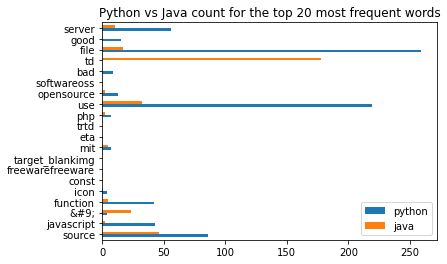

In [18]:
plt.rc('font', size=10)
word_counts.sort_values('javascript', ascending=False).head(20)[['python', 'java']].plot.barh()
plt.title('Python vs Java count for the top 20 most frequent words')

In [19]:
import matplotlib as mpl

/opt/homebrew/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/opt/homebrew/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:379: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 1152x648 with 0 Axes>

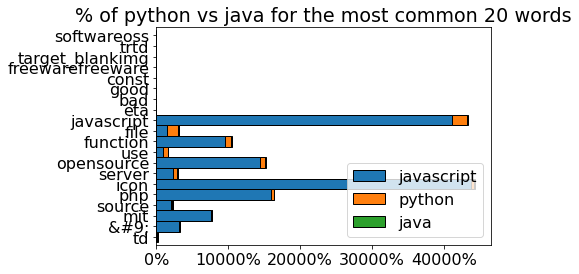

In [20]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='javascript', ascending=False)
 .head(20)
 .apply(lambda row: row / row['java'], axis=1)
 .drop(columns='go')
 .sort_values(by='python')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of python vs java for the most common 20 words')

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

### N-grams

Text(0.5, 1.0, 'Top 10 most common javascript bigrams')

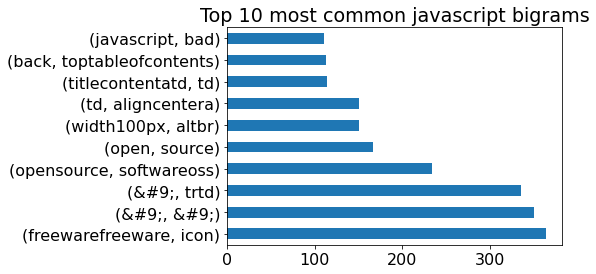

In [21]:
pd.Series(nltk.bigrams(javascript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common javascript bigrams')

### Word Cloud

(-0.5, 799.5, 599.5, -0.5)

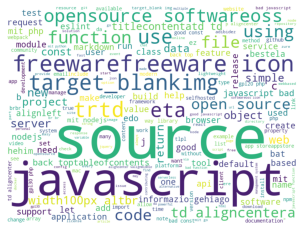

In [22]:
#Javascript word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(javascript_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

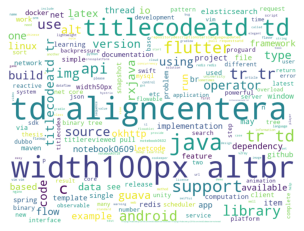

In [23]:
# Java word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(java_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

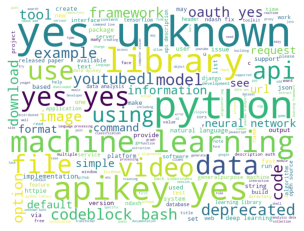

In [24]:
# Python word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(python_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

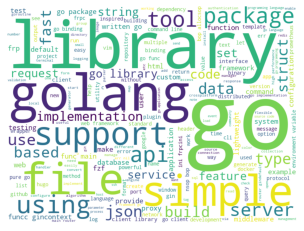

In [25]:
# go word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(go_words)
plt.imshow(img)
plt.axis('off')

### Modeling

In [26]:
#intialize TfidfVectorizer, use single words, bigrams and trigrams
tfidf = TfidfVectorizer(ngram_range=(1,3))
X = tfidf.fit_transform(df.clean)
y = df.language

#split the data into X_train, X_validate, X_test, y_train, y_validate, y_test
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify = y)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=.2, random_state=12, stratify= y_train_validate)

In [27]:
pprint(df.clean)
pd.DataFrame(X.todense(), columns=tfidf.get_feature_names())

0      freecodecamporg social bannerhttpss3amazonawsc...
1      p aligncentera hrefhttpsvuejsorg target_blank ...
2      reacthttpsreactjsorg middot github licensehttp...
3      p aligncenter hrefhttpsgetbootstrapcom img src...
4      public apis run testshttpsgithubcompublicapisp...
                             ...                        
102    img srchttpsgithubcomgogsgogsrawmainpublicimgf...
103    p aligncenterimg aligncenter stylewidth320px s...
104    iptv autoupdatehttpsgithubcomiptvorgiptvaction...
105    mermaid build statushttpstravisciorgmermaidjsm...
106    readmereadme br languagehttpsgithubcomkon9chun...
Name: clean, Length: 107, dtype: object


,000,000 ten,000 ten classic,00008080,00008080 routerrun8080,00008080 routerrun8080 sample,00008080 routerrun8080 serving,00008080 rrun8080,00008080 rrun8080 client,00008080 rrun8080 custom,...,zxf resuming downloads,zynga,zynga engineering,zynga engineering bloghttpswwwzyngacomblogsengineering,zyszyshttpsgithubcomzyszys,zyszyshttpsgithubcomzyszys yongsheng,zyszyshttpsgithubcomzyszys yongsheng zhang,zyte_,zyte_ formerly,zyte_ formerly scrapinghub
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train.value_counts()

JavaScript    35
Python        15
Java          10
Go             8
Name: language, dtype: int64

In [29]:
train['baseline_prediction'] = 'JavaScript'
baseline_score = round(accuracy_score(train.language, train.baseline_prediction),2)
print(f'Our baseline score is {baseline_score}')

Our baseline score is 0.53


In [30]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

#### Decision Tree

In [31]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

#prediction columns 
train['predicted'] = tree.predict(X_train)
test['predicted'] = tree.predict(X_test)

#train and validate scores to check for overfitness 
print(f'train score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

train score: 79.41%
validate score: 70.59%


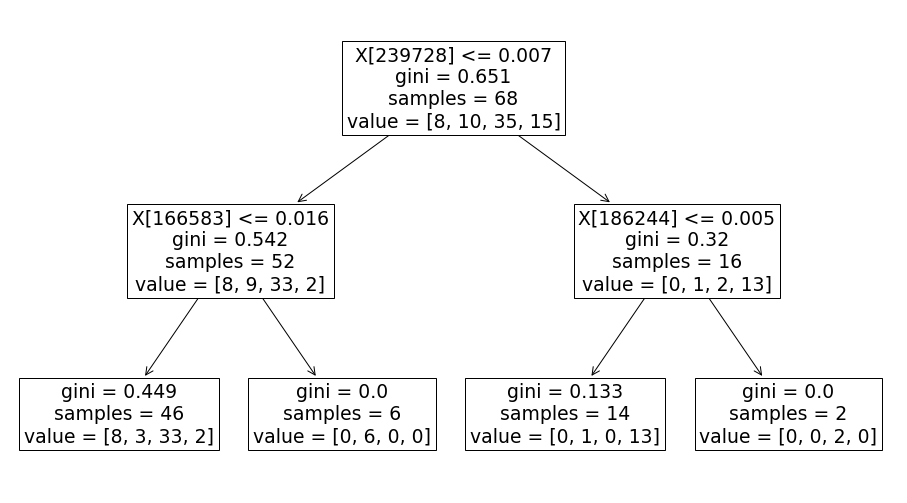

In [37]:
#visualize our decision tree
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

In [44]:
#decision tree scores
tree_accuracy = round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)
tree_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
tree_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Decision Tree!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'Accuracy score is {tree_accuracy}')
print(f'Precision score is {tree_precision}')
print(f'Recall score is {tree_recall}')

Scores for Decision Tree!
---------------------------
Our baseline score is 0.53
Accuracy score is 0.79
Precision score is 0.66
Recall score is 0.62


#### Random Forest

In [46]:
rf = RandomForestClassifier(random_state=906, max_depth = 2).fit(X_train, y_train)

#prediction columns
train['predicted'] = rf.predict(X_train)
test['predicted'] = rf.predict(X_test)

#check for overfitness
print(f'train score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')

train score: 51.47%
validate score: 52.94%


In [47]:
#random forest scores
rf_accuracy = round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)
rf_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
rf_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Random Forest!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'Accuracy score is {rf_accuracy}')
print(f'Precision score is {rf_precision}')
print(f'Recall score is {rf_recall}')

Scores for Random Forest!
---------------------------
Our baseline score is 0.53
Accuracy score is 0.51
Precision score is 0.13
Recall score is 0.25


#### KNN

In [48]:
#fit KNN to our X and y train
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

#prediction columns
train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

#check for overfitness
print(f'train score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

train score: 86.76%
validate score: 82.35%


In [49]:
#knn scores
knn_accuracy = round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)
knn_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
knn_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for KNN!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'Accuracy score is {knn_accuracy}')
print(f'Precision score is {knn_precision}')
print(f'Recall score is {knn_recall}')

Scores for KNN!
---------------------------
Our baseline score is 0.53
Accuracy score is 0.87
Precision score is 0.87
Recall score is 0.82


In [51]:
# Test

In [52]:
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

print(f'train score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

train score: 86.76%
validate score: 82.35%


In [53]:
#get accuracy score for test set predictions vs. test set actual results
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('------------------------------------------------------')

#print the confusion matrix for test set predictions vs test set actual results
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('------------------------------------------------------')

#print classification report 
print(classification_report(test.actual, test.predicted))
print('------------------------------------------------------')

#train, validate, and test scores for KNN
print(f'Our baseline score is {baseline_score*100}%')
print(f'Training score: {knn.score(X_train, y_train):.2%}')
print(f'Validate score: {knn.score(X_validate, y_validate):.2%}')
print(f'Test score: {knn.score(X_test, y_test):.2%}')

Accuracy: 81.82%
------------------------------------------------------
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
Go           1     0           1       0
Java         0     3           0       0
JavaScript   2     0          10       1
Python       0     0           0       4
------------------------------------------------------
              precision    recall  f1-score   support

          Go       0.50      0.33      0.40         3
        Java       1.00      1.00      1.00         3
  JavaScript       0.77      0.91      0.83        11
      Python       1.00      0.80      0.89         5

    accuracy                           0.82        22
   macro avg       0.82      0.76      0.78        22
weighted avg       0.82      0.82      0.81        22

------------------------------------------------------
Our baseline score is 53.0%
Training score: 86.76%
Validate score: 82.35%
Test score: 81.82%
